In [1]:
# pandas和numpy是同一类东西，并且pandas就是根据numpy增强过来的

In [6]:
# 1 serise
import numpy as np
import pandas as pd

In [9]:
s = pd.Series([1, 4, 9, 10, np.nan, 17, 19])
print(s) # 这个的逻辑和np中的array很像，但是可以发现生成的是一个类似dataframe的东西
# 还可以设置按照一定的顺序来设置index
s = pd.Series([1, 4, 9, 10, np.nan, 17, 19], index = [0, 1, 3, 2, 4, 5, 6])
print(s) # 这里生成的index就变成了0132......

0     1.0
1     4.0
2     9.0
3    10.0
4     NaN
5    17.0
6    19.0
dtype: float64
0     1.0
1     4.0
3     9.0
2    10.0
4     NaN
5    17.0
6    19.0
dtype: float64


In [10]:
# 2 dataframe
import numpy as np
import pandas as pd

In [13]:
datas = pd.date_range('2019.09.01', periods = 6)
print(datas) # pd.date_range这个函数是专门用来生成时间序列的
# pd.date_range(start, end, period, freq)等参数
df = pd.DataFrame(np.random.randn(6, 4), index = datas, columns = ['a', 'b', 'c', 'd'])
print(df) # 可以发现pd里面dataframe的构造方法和R里面是十分十分相似的
# np.random.randn(6, 4)函数是在正态总体里面生成一个size为24的样本
# np.random.rand(6, 4)函数则是在(0,1)区间里面生成样本
# 两个函数都是生成一定size的

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06'],
              dtype='datetime64[ns]', freq='D')
                   a         b         c         d
2019-09-01  0.908085  0.085429 -0.843988 -0.077573
2019-09-02 -0.956124  2.428495  1.619161  1.987077
2019-09-03 -1.172393  0.435914  0.151615 -0.088322
2019-09-04 -1.235969  1.406406  0.369150 -0.523410
2019-09-05 -0.456220  0.352788  0.896289 -0.518285
2019-09-06 -1.556286  0.074998  1.145605 -1.072741


In [19]:
print(df['b']) # 索引方式也和R是一模一样的
# 如果没有制定row和col，那就会默认使用从0开始的index
df1 = pd.DataFrame(np.arange(0, 12).reshape(3, 4))
print(df1)

2019-09-01    0.085429
2019-09-02    2.428495
2019-09-03    0.435914
2019-09-04    1.406406
2019-09-05    0.352788
2019-09-06    0.074998
Freq: D, Name: b, dtype: float64
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [28]:
# 也有和R中一样的类似于赋值的dataframe生成方式
df2 = pd.DataFrame({
    'A': [1,2,3,4],
    'B': pd.Timestamp('20180819'),
    'C': pd.Series([1,6,9,10],dtype='float32'),
    'D': np.array([3] * 4,dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'foo'
})
print(df2)
print(df2.index) # 这里只是将row换了个说法叫index
print(df2.columns)
print(df2.values) # 按照每个index输出每行的value情况
print(df2.describe()) # 和R中完全一样
print(df2.T) # 从np中集成过来
print(df2.sort_index(axis = 1, ascending = True)) # 对整体进行排序操作
print(df2.sort_values(by = 'C', ascending = False)) # 对我们指定的某一列进行排序

   A          B     C  D      E    F
0  1 2018-08-19   1.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
3  4 2018-08-19  10.0  3  train  foo
RangeIndex(start=0, stop=4, step=1)
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
[[1 Timestamp('2018-08-19 00:00:00') 1.0 3 'test' 'foo']
 [2 Timestamp('2018-08-19 00:00:00') 6.0 3 'train' 'foo']
 [3 Timestamp('2018-08-19 00:00:00') 9.0 3 'test' 'foo']
 [4 Timestamp('2018-08-19 00:00:00') 10.0 3 'train' 'foo']]
              A          C    D
count  4.000000   4.000000  4.0
mean   2.500000   6.500000  3.0
std    1.290994   4.041452  0.0
min    1.000000   1.000000  3.0
25%    1.750000   4.750000  3.0
50%    2.500000   7.500000  3.0
75%    3.250000   9.250000  3.0
max    4.000000  10.000000  3.0
                     0                    1                    2  \
A                    1                    2                    3   
B  2018-08-19 00:00:00  2018-08-19 00:00:00  2018-08-19 00:00:00   
C

In [29]:
# 3 pandas数据筛选
import numpy as np
import pandas as pd

In [31]:
dates = pd.date_range('20180809', periods = 6)
df = pd.DataFrame(np.arange(0, 24).reshape(6, 4), index = dates, columns = ['A', 'B', 'C', 'D'])
print(df)

             A   B   C   D
2018-08-09   0   1   2   3
2018-08-10   4   5   6   7
2018-08-11   8   9  10  11
2018-08-12  12  13  14  15
2018-08-13  16  17  18  19
2018-08-14  20  21  22  23


In [36]:
# 取某一列数据
print(df.A, df['A'])
# 用index取某行的数据
print(df[0:3])

2018-08-09     0
2018-08-10     4
2018-08-11     8
2018-08-12    12
2018-08-13    16
2018-08-14    20
Freq: D, Name: A, dtype: int64 2018-08-09     0
2018-08-10     4
2018-08-11     8
2018-08-12    12
2018-08-13    16
2018-08-14    20
Freq: D, Name: A, dtype: int64
            A  B   C   D
2018-08-09  0  1   2   3
2018-08-10  4  5   6   7
2018-08-11  8  9  10  11
Empty DataFrame
Columns: [A, B, C, D]
Index: []


In [42]:
print(df['2018-08-09':'2018-08-09']) # 通过这样可以取特定的行
# 根据index去寻找特定行
print(df.loc['2018-08-09']) # 这样会返回这一行的所有元素对应关系

            A  B  C  D
2018-08-09  0  1  2  3
A    0
B    1
C    2
D    3
Name: 2018-08-09 00:00:00, dtype: int64


In [49]:
# de.loc其实接收的是两个参数，分别代表行和列
# 比如我们需要对列进行筛选的话
print(df.loc[:, ['A','B']])
print(df.loc[:, 'A':'B']) # 这两种方法是等价的，但是用列表形式输入的可以选择不相邻的列
# 可以发现，列参数能够省略，但是行参数不可以省略
print(df.loc['2018-08-09', ['A', 'C']]) # 同时对行和列进行筛选

             A   B
2018-08-09   0   1
2018-08-10   4   5
2018-08-11   8   9
2018-08-12  12  13
2018-08-13  16  17
2018-08-14  20  21
             A   B
2018-08-09   0   1
2018-08-10   4   5
2018-08-11   8   9
2018-08-12  12  13
2018-08-13  16  17
2018-08-14  20  21
A    0
C    2
Name: 2018-08-09 00:00:00, dtype: int64


In [56]:
# 相似的，也有df.iloc，是针对index来进行查找的
print(df.iloc[3, 1])
print(df.iloc[3:5, 1:3]) # 可以发现这个和python里面非常多东西都是相似的，只能取到下界
print(df.iloc[[1, 3, 5], 1:3]) # 都是相似的操作逻辑

13
             B   C
2018-08-12  13  14
2018-08-13  17  18
             B   C
2018-08-10   5   6
2018-08-12  13  14
2018-08-14  21  22


In [58]:
# 也可以使用df.ix来进行混合筛选
# 好像现在没有ix这个东西了

In [62]:
# 和R里面相似的，也可以通过逻辑值来判断
print(df)
print(df[df > 8])

             A   B   C   D
2018-08-09   0   1   2   3
2018-08-10   4   5   6   7
2018-08-11   8   9  10  11
2018-08-12  12  13  14  15
2018-08-13  16  17  18  19
2018-08-14  20  21  22  23
               A     B     C     D
2018-08-09   NaN   NaN   NaN   NaN
2018-08-10   NaN   NaN   NaN   NaN
2018-08-11   NaN   9.0  10.0  11.0
2018-08-12  12.0  13.0  14.0  15.0
2018-08-13  16.0  17.0  18.0  19.0
2018-08-14  20.0  21.0  22.0  23.0


In [30]:
# 4 pandas设置值
import numpy as np
import pandas as pd

In [31]:
dates = pd.date_range('20180820', periods = 6)
df = pd.DataFrame(np.arange(24).reshape(6, 4), index = dates, columns = ['A', 'B', 'C', 'D'])
print(df)

             A   B   C   D
2018-08-20   0   1   2   3
2018-08-21   4   5   6   7
2018-08-22   8   9  10  11
2018-08-23  12  13  14  15
2018-08-24  16  17  18  19
2018-08-25  20  21  22  23


In [32]:
# 前面提到的iloc/loc，和R中一样的，可以用来进行dataframe的元素赋值操作
df.iloc[2, 2] = 111
df.loc['2018-08-21', 'B'] = 2222
print(df)
# 也可以根据条件进行赋值，其实就是从上面的筛选的逻辑来进行的
df.B[df.A > 4] = 0
print(df)
# 按照行列来进行设置
df['F'] = np.nan # 这种方法只能用来筛选列
print(df) # 这种方法也可以新增一行或者一列

             A     B    C   D
2018-08-20   0     1    2   3
2018-08-21   4  2222    6   7
2018-08-22   8     9  111  11
2018-08-23  12    13   14  15
2018-08-24  16    17   18  19
2018-08-25  20    21   22  23
             A     B    C   D
2018-08-20   0     1    2   3
2018-08-21   4  2222    6   7
2018-08-22   8     0  111  11
2018-08-23  12     0   14  15
2018-08-24  16     0   18  19
2018-08-25  20     0   22  23
             A     B    C   D   F
2018-08-20   0     1    2   3 NaN
2018-08-21   4  2222    6   7 NaN
2018-08-22   8     0  111  11 NaN
2018-08-23  12     0   14  15 NaN
2018-08-24  16     0   18  19 NaN
2018-08-25  20     0   22  23 NaN


In [33]:
# 添加一列特定的序列，也是一样的道理
# 当然数量是要对齐的
df['E'] = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20180820', periods = 6))
print(df)

             A     B    C   D   F  E
2018-08-20   0     1    2   3 NaN  1
2018-08-21   4  2222    6   7 NaN  2
2018-08-22   8     0  111  11 NaN  3
2018-08-23  12     0   14  15 NaN  4
2018-08-24  16     0   18  19 NaN  5
2018-08-25  20     0   22  23 NaN  6


In [43]:
# 如果需要修改一整行的数据，还是直接用index或者loc/iloc比较方便
print(df)
df[1:2] = np.nan # 注意切片操作的逻辑，半开半闭区间
print(df)
df.iloc[1] = np.nan
print(df)
df.loc['2018-08-21'] = np.nan
print(df)

               A    B      C     D   F    E
2018-08-20   0.0  1.0    2.0   3.0 NaN  1.0
2018-08-21   NaN  NaN    NaN   NaN NaN  NaN
2018-08-22   8.0  0.0  111.0  11.0 NaN  3.0
2018-08-23  12.0  0.0   14.0  15.0 NaN  4.0
2018-08-24  16.0  0.0   18.0  19.0 NaN  5.0
2018-08-25  20.0  0.0   22.0  23.0 NaN  6.0
               A    B      C     D   F    E
2018-08-20   0.0  1.0    2.0   3.0 NaN  1.0
2018-08-21   NaN  NaN    NaN   NaN NaN  NaN
2018-08-22   8.0  0.0  111.0  11.0 NaN  3.0
2018-08-23  12.0  0.0   14.0  15.0 NaN  4.0
2018-08-24  16.0  0.0   18.0  19.0 NaN  5.0
2018-08-25  20.0  0.0   22.0  23.0 NaN  6.0
               A    B      C     D   F    E
2018-08-20   0.0  1.0    2.0   3.0 NaN  1.0
2018-08-21   NaN  NaN    NaN   NaN NaN  NaN
2018-08-22   8.0  0.0  111.0  11.0 NaN  3.0
2018-08-23  12.0  0.0   14.0  15.0 NaN  4.0
2018-08-24  16.0  0.0   18.0  19.0 NaN  5.0
2018-08-25  20.0  0.0   22.0  23.0 NaN  6.0
               A    B      C     D   F    E
2018-08-20   0.0  1.0    2.0   3

In [44]:
# 5 pandas处理丢失的数据
import numpy as np
import pandas as pd

In [50]:
dates = pd.date_range('20180820', periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index = dates, columns=['A', 'B', 'C', 'D']) 
print(df)
df.iloc[0, 1] = np.nan
df.iloc[1 ,2] = np.nan
print(df)

             A   B   C   D
2018-08-20   0   1   2   3
2018-08-21   4   5   6   7
2018-08-22   8   9  10  11
2018-08-23  12  13  14  15
2018-08-24  16  17  18  19
2018-08-25  20  21  22  23
             A     B     C   D
2018-08-20   0   NaN   2.0   3
2018-08-21   4   5.0   NaN   7
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23


In [56]:
print(df.dropna()) # 默认是drop含有NA的行
print(df.dropna(
    axis = 1,
    how = 'any'
)) # 1对列进行操作，any表示只要含有NA就删除，而all则是全部是NA才删除
# 这地方的axis和np里面是反着来的

             A     B     C   D
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23
             A   D
2018-08-20   0   3
2018-08-21   4   7
2018-08-22   8  11
2018-08-23  12  15
2018-08-24  16  19
2018-08-25  20  23


In [63]:
# 对NA进行替换
print(df.fillna(19))
# 检测NA或者NULL
print(df.isnull())
print(df.isna())
# 也可以加上any()，用来对某一列检测
print(df.isna().any()) # 返回的是ABCD四列的检测结果
# 检测整个数据中是否含有NA
print(np.any(df.isna() == True))

             A     B     C   D
2018-08-20   0  19.0   2.0   3
2018-08-21   4   5.0  19.0   7
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23
                A      B      C      D
2018-08-20  False   True  False  False
2018-08-21  False  False   True  False
2018-08-22  False  False  False  False
2018-08-23  False  False  False  False
2018-08-24  False  False  False  False
2018-08-25  False  False  False  False
                A      B      C      D
2018-08-20  False   True  False  False
2018-08-21  False  False   True  False
2018-08-22  False  False  False  False
2018-08-23  False  False  False  False
2018-08-24  False  False  False  False
2018-08-25  False  False  False  False
A    False
B     True
C     True
D    False
dtype: bool
True


In [64]:
# 6 pandas数据的导入导出
import pandas

In [78]:
data = pd.read_csv('../lung_PTX/Human_GeCKOv2_Library_A_3_mageck.csv', sep = '\t', header = None)
# 要注意这里的header并不是和R里面一样的bool，而是指定某一行作为header，输入None和一个数字
print(data.head(10))
print(data.tail(10))

                                         0
0   HGLibA_00001,GTCGCTGAGCTCCGATTCGA,A1BG
1   HGLibA_00002,ACCTGTAGTTGCCGGCGTGC,A1BG
2   HGLibA_00003,CGTCAGCGTCACATTGGCCA,A1BG
3   HGLibA_00004,CGCGCACTGGTCCAGCGCAC,A1CF
4   HGLibA_00005,CCAAGCTATATCCTGTGCGC,A1CF
5   HGLibA_00006,AAGTTGCTTGATTGCATTCT,A1CF
6    HGLibA_00007,CGCTTCTTAAATTCTTGGGT,A2M
7    HGLibA_00008,TCACAGCGAAGGCGACACAG,A2M
8    HGLibA_00009,CAAACTCCTTCATCCAAGTC,A2M
9  HGLibA_00010,AAATTTCCCCTCCGTTCAGA,A2ML1
                                                       0
65373  HGLibA_65374,GCCCCGCCGCCCTCCCCTCC,NonTargeting...
65374  HGLibA_65375,AAAGAAAGAGGAATAGTAGC,NonTargeting...
65375  HGLibA_65376,GAGAAGTGGGGAGCCATTGG,NonTargeting...
65376  HGLibA_65377,AGAAGAAAAAAATGTCTACG,NonTargeting...
65377  HGLibA_65378,GACTGAAATCCAAGGACTGT,NonTargeting...
65378  HGLibA_65379,ATATTTTATGACATAAAAAT,NonTargeting...
65379  HGLibA_65380,TAAACAAAAAGGAAATAGTT,NonTargeting...
65380  HGLibA_65381,TTTCCCATGATCATTTAGTG,NonTargeting...
65381  HGLibA_

In [80]:
# 导出数据
data.to_pickle('./pandas_test.pickle')
# Python 中有个序列化过程叫作 pickle，它能够实现任意对象与文本之间的相互转化，
# 也可以实现任意对象与二进制之间的相互转化。也就是说，pickle 可以实现 Python 对象的存储及恢复。
# 简而言之，是个很牛逼的数据格式
# 当然导出成为csv之类的也是可以的

In [2]:
# 7 合并操作
import numpy as np
import pandas as pd

In [7]:
df1 = pd.DataFrame(np.ones((3, 4))*0, columns = ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4))*1, columns = ['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4))*2, columns = ['a', 'b', 'c', 'd'])
print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [13]:
# rbind
res = pd.concat(objs = [df1, df2, df3], axis = 0)
print(res)
# rbind常常会出现index重复的情况，只需要设置
res = pd.concat(objs = [df1, df2, df3], axis = 0, ignore_index = True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [17]:
# concat函数默认的合并方式是join = 'outer'
df2 = pd.DataFrame(np.ones((3, 4))*1, columns = ['b', 'c', 'd', 'e'], index = [2, 3, 4])
print(pd.concat([df1, df2], join = 'outer'))
# 可以发现，默认的outer合并方式是按照列进行合并，不能合并上的就用NA来代替
# 与之相反的，inner则只会合并具有相同字段的
print(pd.concat([df1, df2], join = 'inner'))

     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [22]:
# 与list一样的，同样可以使用append函数来添加
# 要注意的是，append只能纵向合并
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
# 将df2合并到df1下面,以及重置index,并打印出结果
res = df1.append(df2,ignore_index=True)
print(res)
# 说append也要被移除了，建议用concat

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


/var/folders/m8/1942_3tx5zs36wy7mlbkyssc0000gn/T/ipykernel_57458/2106300228.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2,ignore_index=True)


In [31]:
left = pd.DataFrame({'key':['K0', 'K1', 'K2', 'K3'],
                    'A':['A0', 'A1', 'A2', 'A3'],
                    'B':['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C' : ['C0', 'C1', 'C2', 'C3'],
                      'D' : ['D0', 'D1', 'D2', 'D3']})
print(left) # 可以发现这种构造方式其实就是输入了一个dict
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [32]:
# 使用merge进行合并
# merge提供的是列合并
res = pd.merge(left, right, on = 'key')
# on参数则表示合并的依据
print(res)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [38]:
# on参数支持传入多个key作为依据
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
res = pd.merge(left, right, on = ['key1', 'key2'])
print(res)
# 默认使用的是inner模式进行合并
print(pd.merge(left, right, on = ['key1', 'key2'], how = 'inner'))
print(pd.merge(left, right, on = ['key1', 'key2'], how = 'outer'))
print(pd.merge(left, right, on = ['key1', 'key2'], how = 'right')) # 以右边为准
print(pd.merge(left, right, on = ['key1', 'key2'], how = 'left')) # 相似的，以左边为准

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3
  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3
  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [40]:
# 同时也可以设置indicator参数来显示合并的情况
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)

print(pd.merge(df1,df2,on='col1',how='outer',indicator=True))
print(pd.merge(df1,df2,on='col1',how='outer',indicator='test_test')) # 自由设置列名字

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only
   col1 col_left  col_right   test_test
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [42]:
# 也可以设置right/left_index参数来实现按照index的合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(pd.merge(left, right, right_index = True, left_index = True, how = 'outer'))

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [46]:
# 当两个dataframe存在相同的col时，merge常常会出现overlapping的问题
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6


In [49]:
print(pd.merge(boys, girls, on = 'k', how = 'inner'))
# 会默认让age更改，但是更改后的很丑
print(pd.merge(boys, girls, on = 'k', how = 'inner', suffixes = ['_boys', '_girls']))
# 其实就是通过一个suffixes参数传入自定的后缀

    k  age_x  age_y
0  K0      1      4
1  K0      1      5
    k  age_boys  age_girls
0  K0         1          4
1  K0         1          5


In [52]:
# 8 pandas画图
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data = pd.Series(np.random.randn(1000), index = np.arange(1000))
print(data)
print(data.cumsum())

0      2.274101
1      0.039350
2      0.024187
3     -0.303467
4     -0.284544
         ...   
995    0.751023
996    1.847451
997   -0.670188
998    1.101704
999    1.260631
Length: 1000, dtype: float64
0      2.274101
1      2.313450
2      2.337637
3      2.034170
4      1.749627
         ...   
995   -2.177003
996   -0.329552
997   -0.999739
998    0.101965
999    1.362596
Length: 1000, dtype: float64


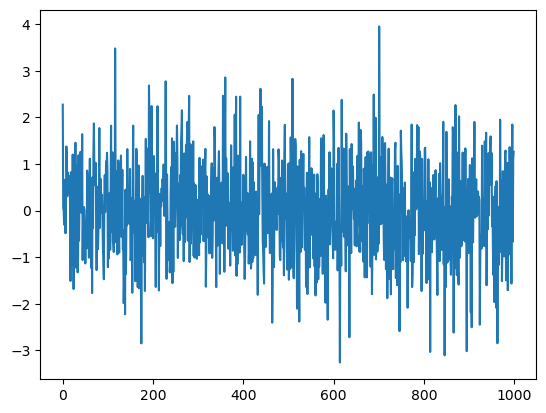

In [60]:
# data本身就是一个数据，所以可以直接画图
data.plot() # 其实直接用plot函数就会显示结果
plt.show()

<AxesSubplot:>

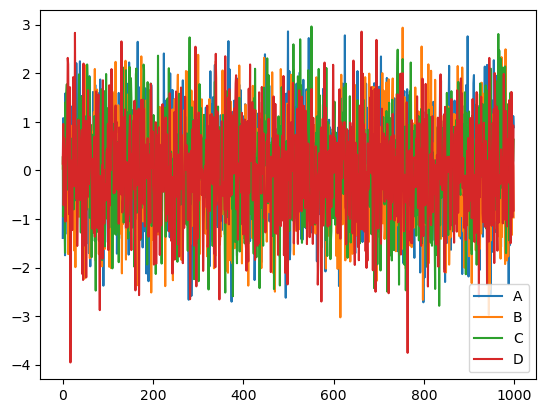

In [62]:
data = pd.DataFrame(np.random.randn(1000, 4), index = np.arange(1000), columns = list('ABCD'))
data.plot()

In [63]:
help(data.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : str, scalar or array-like, optional
        The size of each point. Possible values are:
    
       

AxesSubplot(0.125,0.11;0.775x0.77)


<AxesSubplot:xlabel='A', ylabel='C'>

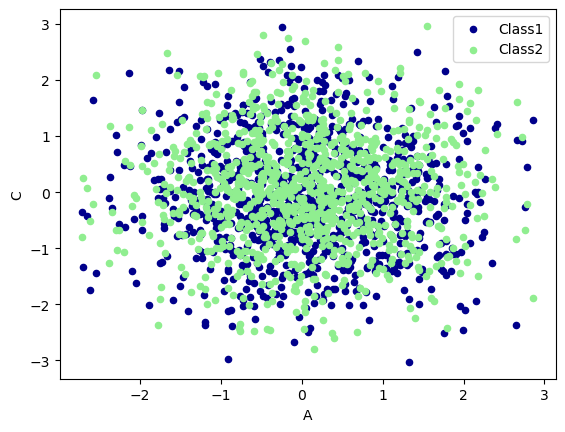

In [66]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
print(ax)
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
# 其实就是利用第一个ax保存了第一个图层的数据，而后在画第二张图的时候把上一个图ax的数据作为参数传进去
# 这是一种画不同图层很方便的方法